In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
def step_signal (low, high, s_low=0.1, s_high=0.1, larg_high_i=20, larg_high_f=100, larg_low_i=100, larg_low_f=120, prob_positivo=0.5, n=100):
       
    distrib = np.random.binomial(1,prob_positivo,n)
    signal = np.concatenate([np.random.uniform(high-s_high,high+s_high,np.random.randint(larg_high_i, larg_high_f)) if x == 1 else np.random.uniform(low-s_low,low+s_low,np.random.randint(larg_low_i, larg_low_f)) for x in distrib])
    return signal


In [80]:
signal = pd.Series(step_signal(-0.5,0.5,n=10))
print(max(signal), min(signal))
print(signal.mean())

0.5983675979763945 -0.5992903601456018
-0.26387369588334564


In [81]:
zero_1 = round((max(signal) + min(signal) )/2,4)

In [82]:
zero = round(signal.mean(),4)

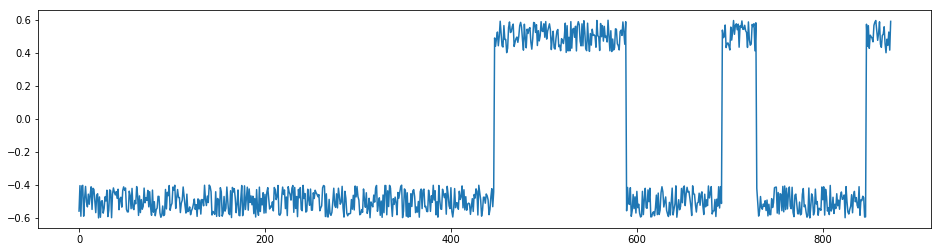

In [83]:
plt.figure(figsize=(16,4))
plt.plot(signal)

In [106]:
def parametros (U):
    #U_max = max(abs(U))
    t = U.abs().idxmax()
    print(t)
    P = 2*np.exp(-6*max(abs(U)**2)/((len(signal)**2)+(len(signal)**3)))
    condicao = P < 0.01
    parametros = {
        #'Ut': U_max,
        't': t,
        'P': P,
        'P < a': condicao
        }
    return parametros

In [107]:
def step_1(signal):
    v = pd.Series(index=signal.index)
    for i, s in signal.iteritems():
        v[i] = np.sum(np.sign(s-signal))
    
    return np.cumsum(v)

In [120]:
def step_2(signal,t):
    #print('entreistep')
    signal_1 = signal[0:t]
    signal_2 = signal[t:]
    U1 = step_1(signal_1)
    U2 = step_1(signal_2)
    par_1 = parametros(U1)
    par_2 = parametros(U2)
    if par_1['P < a']:
        print(par_1)
        step_2(signal_1,par_1['t'])
    elif par_2['P < a']:
        print(par_2)
        step_2(signal_2,par_2['t'])
    else:
#         pass
        return par_2

In [121]:
U = step_1(signal)
par = parametros(U)
print(par)
step_2(signal,par['t'])

445
{'t': 445, 'P': 2.808634069030662e-28, 'P < a': True}
50
588
{'t': 588, 'P': 0.0004952381276476452, 'P < a': True}
588


ValueError: attempt to get argmax of an empty sequence

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(signal)

In [ ]:
v = []
for i in np.arange(1,len(signal)):
    v.append(np.sum(np.sign(signal[i]-signal)))

U = np.cumsum(v)

In [ ]:
P = 2*np.exp(-6*max(abs(U)**2)/((len(signal)**2)+(len(signal)**3)))

In [ ]:
def step1(signal):
    v = pd.Series(index=signal.index)
    for i, s in signal.iteritems():
        v[i] = np.sum(np.sign(s-signal))
    
    return np.cumsum(v)

In [ ]:
U = step1(signal)
param = parametros(U)
plt.figure(figsize=(16,4))
plt.plot(U)

In [ ]:
t = param['t']
print(t)
signal_1 = signal[0:t]
U1 = step1(signal_1)
param = parametros(U1)
plt.figure(figsize=(16,4))
plt.plot(U1)

In [ ]:
U2 = step1(signal_2)
param = parametros(U2)
signal_2 = signal[t:len(signal)]
plt.figure(figsize=(16,4))
plt.plot(U2)